In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'font.family': 'sans serif'})
plt.rcParams.update({'mathtext.default':'regular'})
plt.rcParams.update({'mathtext.fontset':'stixsans'})
plt.rcParams.update({'axes.linewidth': 1.5})
plt.rcParams.update({'xtick.direction':'in'})
plt.rcParams.update({'xtick.major.size': 5})
plt.rcParams.update({'xtick.major.width': 1.25 })
plt.rcParams.update({'xtick.minor.size': 2.5})
plt.rcParams.update({'xtick.minor.width': 1.25 })
plt.rcParams.update({'ytick.direction':'in'})
plt.rcParams.update({'ytick.major.size': 5})
plt.rcParams.update({'ytick.major.width': 1.25 })
plt.rcParams.update({'ytick.minor.size': 2.5})
plt.rcParams.update({'ytick.minor.width': 1.25 })

import warnings
warnings.filterwarnings("ignore")

import glob
import os
os.chdir("../python/")
import dust_integrator
os.chdir("../cuda/")

T_colors = ["lightskyblue", "violet", "forestgreen", "darkviolet", "thistle", "cadetblue", 
            "palegoldenrod", "darksalmon", "indigo"]

YR_IN_S = 3.154e7

import h5py

<Figure size 720x576 with 0 Axes>

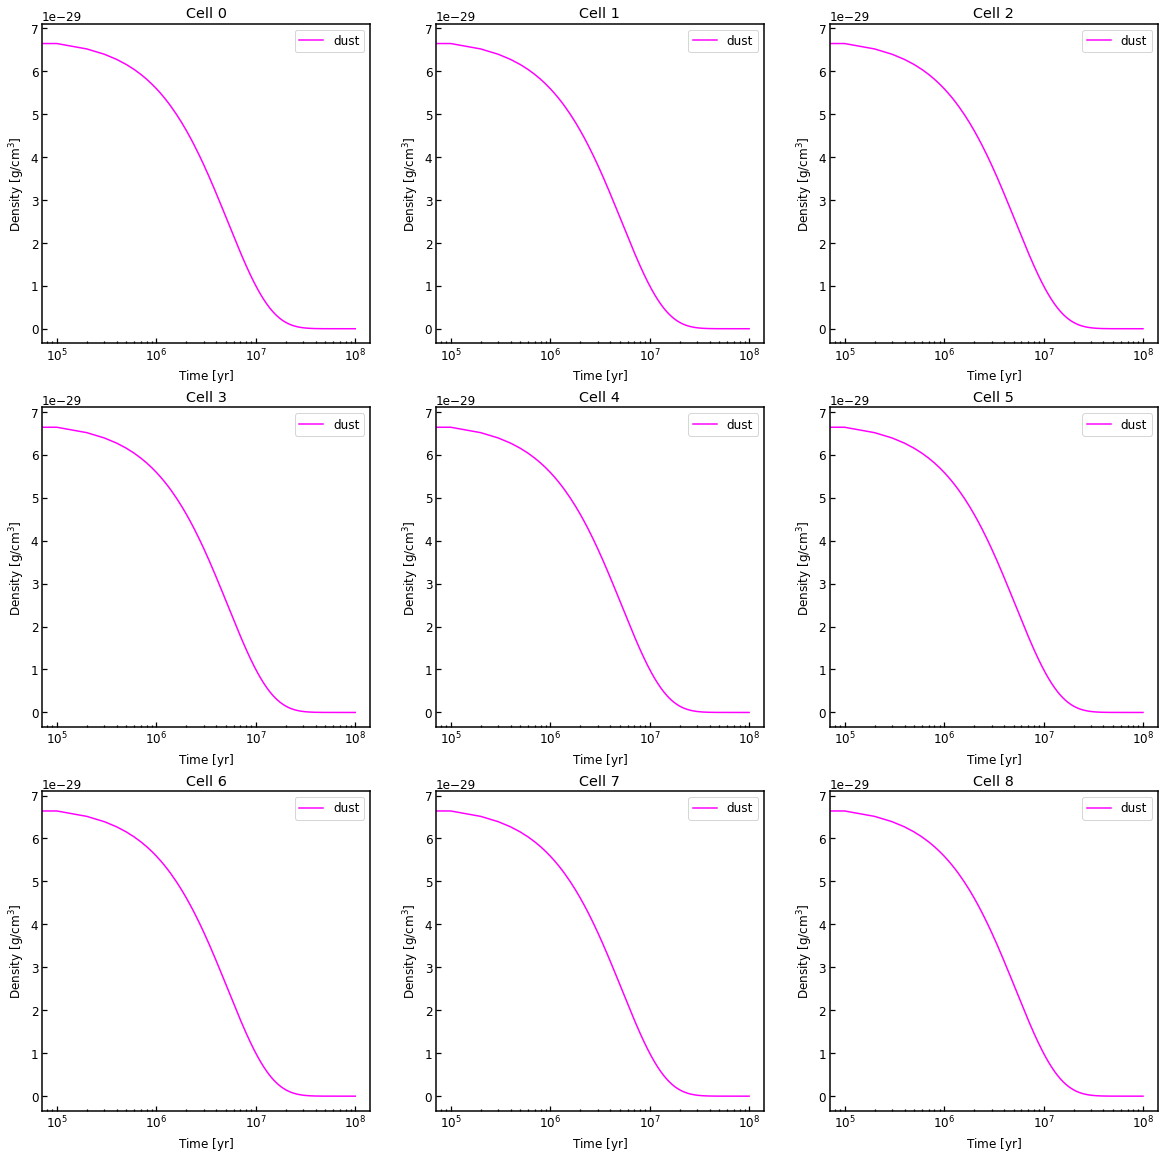

In [2]:
tests = ["const_1D"]

d_gas = []
d_dust = []
t_arr = []

LENGTH_UNIT = 3.08567758e21 # kpc in cm
MASS_UNIT = 1.98855e33 # solar mass in grams
TIME_UNIT = 3.15569e10 # kyr in s
DENSITY_UNIT = (MASS_UNIT/(LENGTH_UNIT**3))
VELOCITY_UNIT = (LENGTH_UNIT/TIME_UNIT)
PRESSURE_UNIT = (DENSITY_UNIT*VELOCITY_UNIT**2)
ENERGY_UNIT = (DENSITY_UNIT*VELOCITY_UNIT*VELOCITY_UNIT)

n = 1000

for test_i in tests:
    dnamein = f"./cholla_out/{test_i}/"
    dnameout = f"./cholla_out/{test_i}/"
    i_out = np.arange(0, n)
    DE = 0
    for i in i_out:
        f = h5py.File(dnamein + str(i) + ".h5.0", "r")
        head = f.attrs # Allows dictionary-style access to an HDF5 object's attributes.
        a_group_key = list(f.keys())
        
        t_arr.append(head["t"]*1e3)
        
        nx = head["dims"][0]
        xrange = np.arange(0, nx + 1)
        gamma = head["gamma"][0]
        d = np.array(f["density"])[0] # mass density
        mx = np.array(f["momentum_x"]) # x-momentum
        my = np.array(f["momentum_y"]) # y-momentum
        mz = np.array(f["momentum_z"]) # z-momentum
        E = np.array([f["Energy"]])*ENERGY_UNIT # total energy density
        d_dust_i = np.array(f["scalar0"]) # dust density
        
        d_dust.append(d_dust_i*DENSITY_UNIT)
        d_gas.append(d*DENSITY_UNIT)

        vx = mx / d
        vy = my / d
        vz = mz / d

fig = plt.figure(figsize=(10,8))

d_dust_cell = np.zeros((10, len(t_arr)))
for i, d_i in enumerate(d_dust):
    for j, cell in enumerate(d_i):
        d_dust_cell[j][i] = cell

fig, axs = plt.subplots(3, 3, constrained_layout=False, figsize=(20,20))
for i, ax in enumerate(axs.flat):
    ax.semilogx(t_arr, d_dust_cell[i], color="magenta", label=f"dust")
    ax.set_title(f"Cell {i}")
    ax.legend()
    ax.set_xlabel("Time$~[yr]$")
    ax.set_ylabel(r"Density$~[g/cm^3]$")

<Figure size 720x576 with 0 Axes>

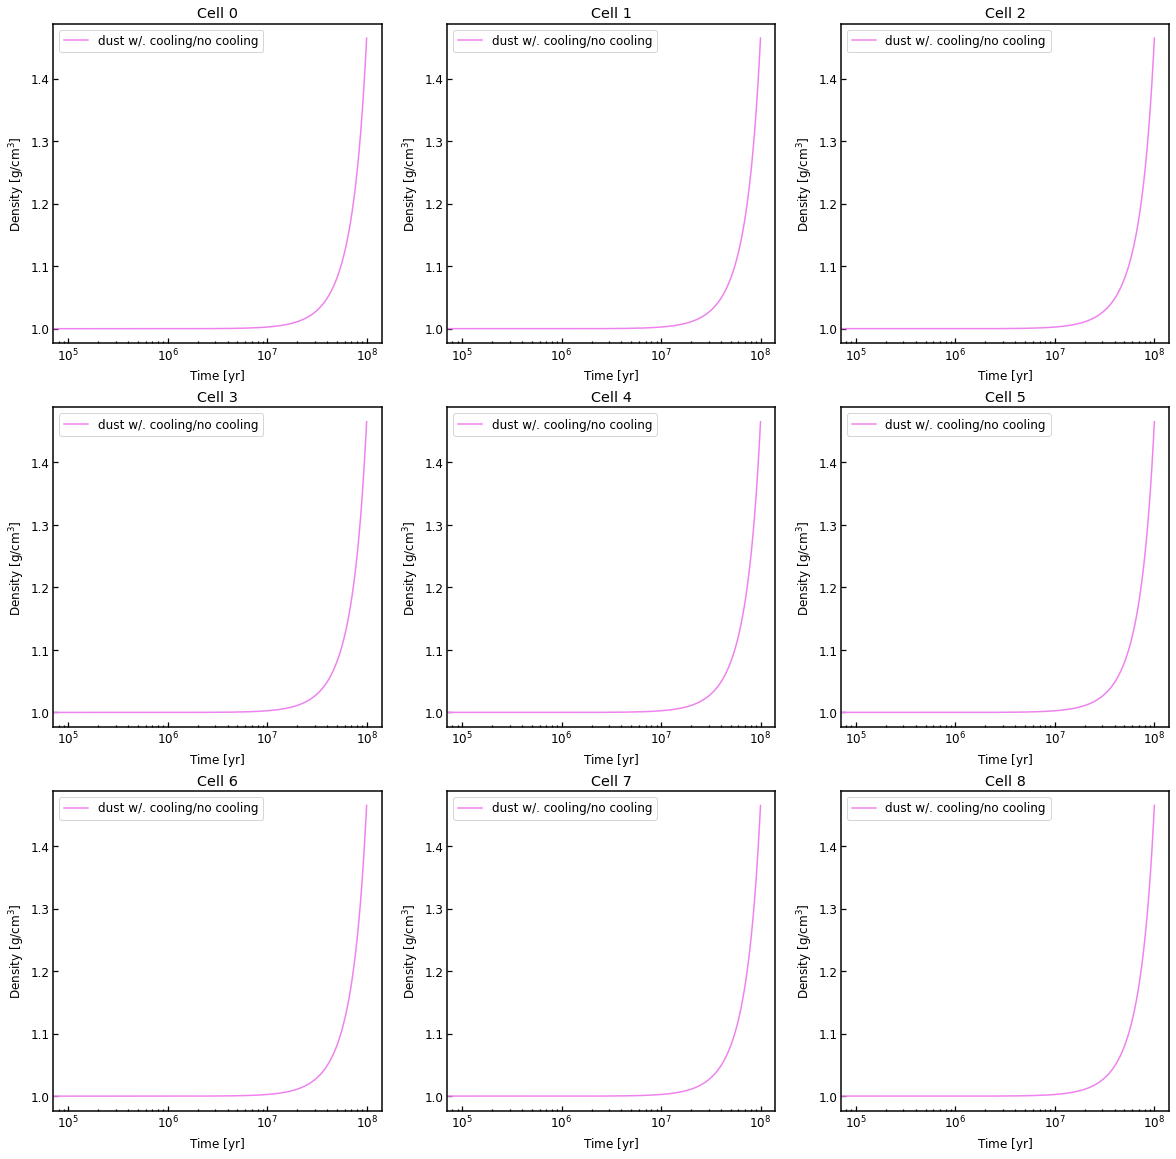

In [15]:
tests = ["const_1D_cool"]

d_gas_cool = []
d_dust_cool = []
t_arr_cool = []
E_cool = []

LENGTH_UNIT = 3.08567758e21 # kpc in cm
MASS_UNIT = 1.98855e33 # solar mass in grams
TIME_UNIT = 3.15569e10 # kyr in s
DENSITY_UNIT = (MASS_UNIT/(LENGTH_UNIT**3))
VELOCITY_UNIT = (LENGTH_UNIT/TIME_UNIT)
PRESSURE_UNIT = (DENSITY_UNIT*VELOCITY_UNIT**2)
ENERGY_UNIT = (DENSITY_UNIT*VELOCITY_UNIT*VELOCITY_UNIT)

for test_i in tests:
    dnamein = f"./cholla_out/{test_i}/"
    dnameout = f"./cholla_out/{test_i}/"
    i_out = np.arange(0, n)
    DE = 0
    for i in i_out:
        f = h5py.File(dnamein + str(i) + ".h5.0", "r")
        head = f.attrs # Allows dictionary-style access to an HDF5 object's attributes.
        a_group_key = list(f.keys())
        
        t_arr_cool.append(head["t"]*1e3)
        
        nx = head["dims"][0]
        xrange = np.arange(0, nx + 1)
        gamma = head["gamma"][0]
        d = np.array(f["density"]) # mass density
        mx = np.array(f["momentum_x"]) # x-momentum
        my = np.array(f["momentum_y"]) # y-momentum
        mz = np.array(f["momentum_z"]) # z-momentum
        E = np.array(f["Energy"]) # total energy density
        d_dust_i = np.array(f["scalar0"]) # dust density
        
        d_dust_cool.append(d_dust_i*DENSITY_UNIT)
        d_gas_cool.append(d*DENSITY_UNIT)
        E_cool.append(E*ENERGY_UNIT)
        

        vx = mx / d
        vy = my / d
        vz = mz / d

fig = plt.figure(figsize=(10,8))

d_dust_cell_cool = np.zeros((10, len(t_arr)))
for i, d_i in enumerate(d_dust_cool):
    for j, cell in enumerate(d_i):
        d_dust_cell_cool[j][i] = cell
        
d_gas_cell_cool = np.zeros((10, len(t_arr)))
for i, d_i in enumerate(d_gas_cool):
    for j, cell in enumerate(d_i):
        d_gas_cell_cool[j][i] = cell
        
E_cell_cool = np.zeros((10, len(t_arr)))
for i, d_i in enumerate(E_cool):
    for j, cell in enumerate(d_i):
        E_cell_cool[j][i] = cell

fig, axs = plt.subplots(3, 3, constrained_layout=False, figsize=(20,20))
for i, ax in enumerate(axs.flat):
    ax.semilogx(t_arr_cool, d_dust_cell_cool[i]/d_dust_cell[i], color="violet", label=f"dust w/. cooling/no cooling")
    #ax.semilogx(t_arr, d_dust_cell[i], color="k", label=f"dust")
    ax.set_title(f"Cell {i}")
    ax.legend()
    ax.set_xlabel("Time$~[yr]$")
    ax.set_ylabel(r"Density$~[g/cm^3]$")

In [22]:
from IPython import display

tests = ["const_2D"]

d_2D = []
d_dust_2D = []
t_arr_2D = []
E_2D = []

LENGTH_UNIT = 3.08567758e21 # kpc in cm
MASS_UNIT = 1.98855e33 # solar mass in grams
TIME_UNIT = 3.15569e10 # kyr in s
DENSITY_UNIT = (MASS_UNIT/(LENGTH_UNIT**3))
VELOCITY_UNIT = (LENGTH_UNIT/TIME_UNIT)
PRESSURE_UNIT = (DENSITY_UNIT*VELOCITY_UNIT**2)
ENERGY_UNIT = (DENSITY_UNIT*VELOCITY_UNIT*VELOCITY_UNIT)

for test_i in tests:
    dnamein = f"./cholla_out/{test_i}/"
    dnameout = f"./cholla_out/{test_i}/"
    i_out = np.arange(0, n)
    DE = 0
    for i in i_out:
        f = h5py.File(dnamein + str(i) + ".h5.0", "r")
        head = f.attrs # Allows dictionary-style access to an HDF5 object's attributes.
        a_group_key = list(f.keys())
        
        t_arr_2D.append(head["t"]*1e3)
        
        nx = head["dims"][0]
        xrange = np.arange(0, nx + 1)
        gamma = head["gamma"][0]
        d = np.array(f["density"]) # mass density
        mx = np.array(f["momentum_x"]) # x-momentum
        my = np.array(f["momentum_y"]) # y-momentum
        mz = np.array(f["momentum_z"]) # z-momentum
        E = np.array(f["Energy"]) # total energy density
        d_dust_i = np.array(f["scalar0"]) # dust density

        d_dust_2D.append(d_dust_i*DENSITY_UNIT)
        d_2D.append(d*DENSITY_UNIT)
        E_2D.append(E*ENERGY_UNIT)
        

        vx = mx / d
        vy = my / d
        vz = mz / d

fig = plt.figure(figsize=(10,8))

fig, axs = plt.subplots(3, 3, constrained_layout=False, figsize=(20,20))
for i, ax in enumerate(axs.flat):
    ax.imshow(d_dust_2D[i], cmap="magma")
    ax.set_title(f"Cell {i}")
    ax.set_xlabel("Time$~[yr]$")
    ax.set_ylabel(r"Density$~[g/cm^3]$")
    plt.show()
    display.clear_output(wait=True)